

# **EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/E-commerce/Eco-churn-clean.xlsx')

In [ ]:
df_1 = df.copy()

In [ ]:
df_1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159.93
1,1,9,Phone,1,8,UPI,Male,3,4,Mobile,3,Single,7,1,15,0,1,0,120.90
2,1,9,Phone,1,30,Debit Card,Male,2,4,Mobile,3,Single,6,1,14,0,1,3,120.28
3,1,0,Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134.07
4,1,0,Phone,1,12,CC,Male,3,3,Mobile,5,Single,3,0,11,1,1,3,129.60


**Check target variable**

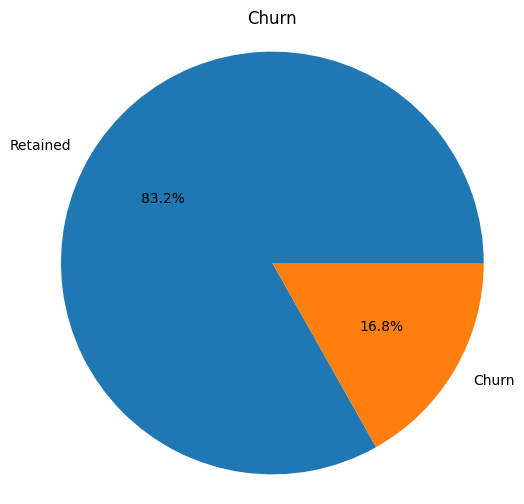

In [ ]:
#Check target variable
labels = ['Retained','Churn']
counts = df_1['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Churn')
plt.axis('equal')
plt.show()

In [ ]:
df_1['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

There are 4682 users (83,2%) retained and 948 users (16,8%) churned. The data is highly imbalanced, it need to be processed before building the models.

**Plot distribution of individual predictors by churn**


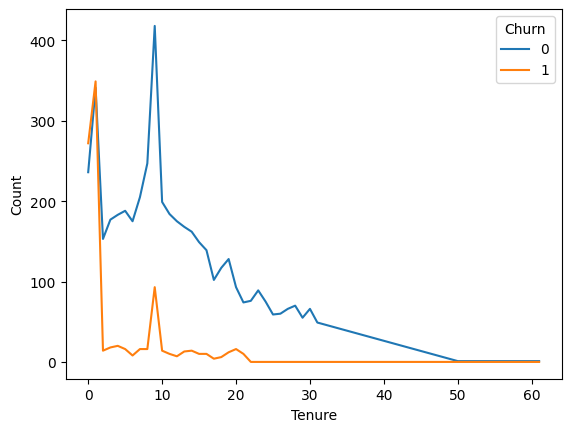

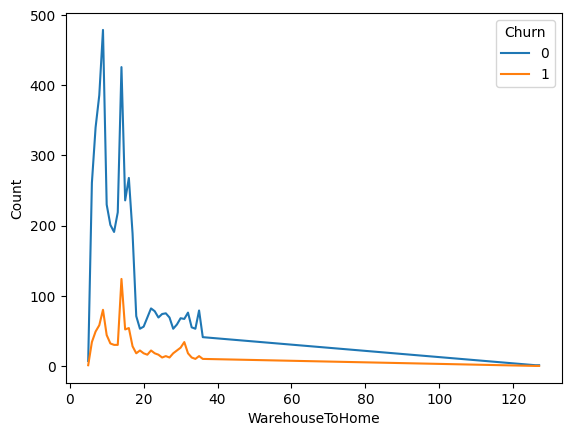

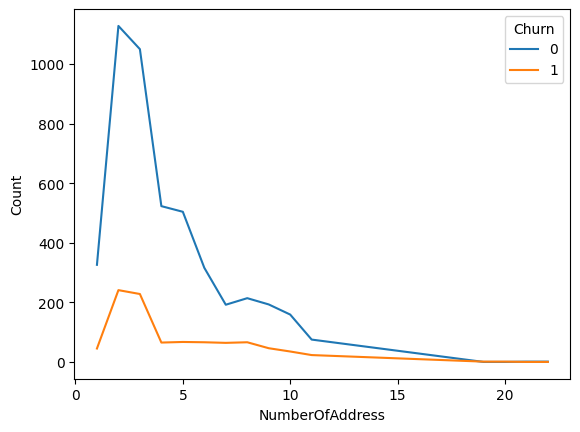

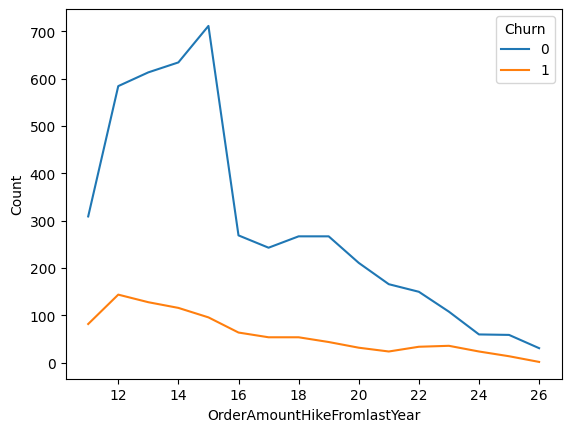

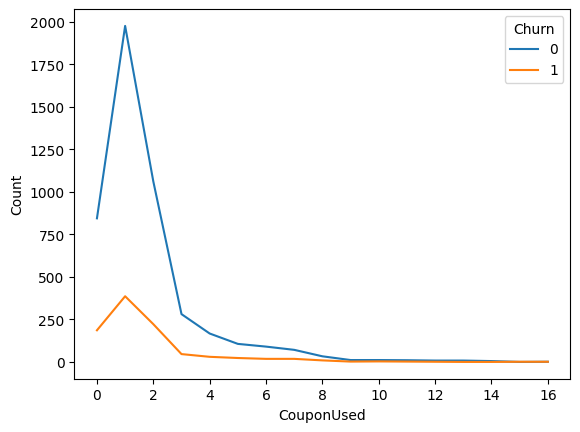

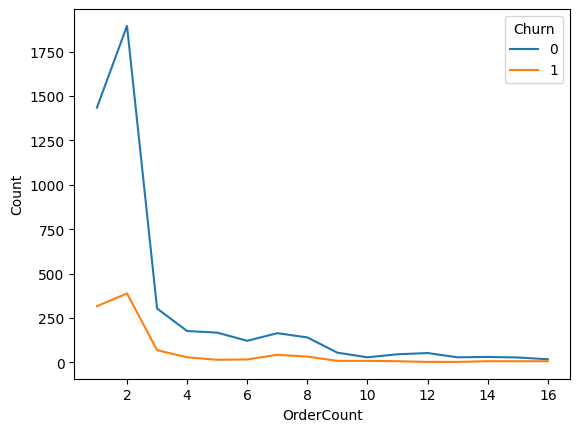

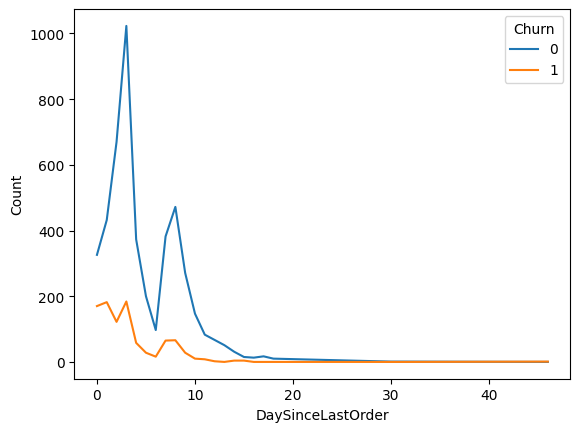

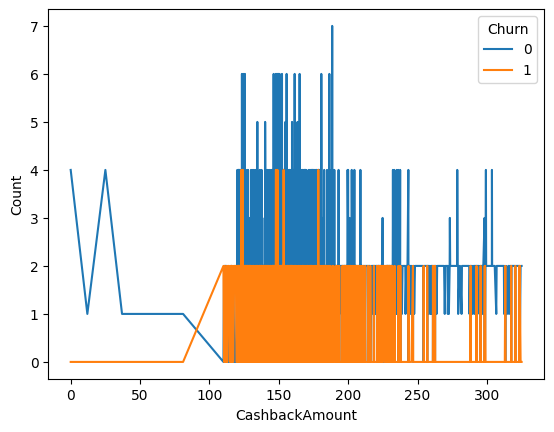

In [ ]:
#Line Chart
for i in df_1[['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']]:
  counts = df_1.groupby(i)['Churn'].value_counts().unstack().fillna(0)
  counts.plot(kind='line')

  plt.xlabel(i)
  plt.ylabel('Count')
  plt.legend(title='Churn')
  plt.show()

**Insight:**

*   Customers who churn are mainly customers with short tenures (0 - 10 tenures)
*   Most customers churn after their 1st or 2nd order



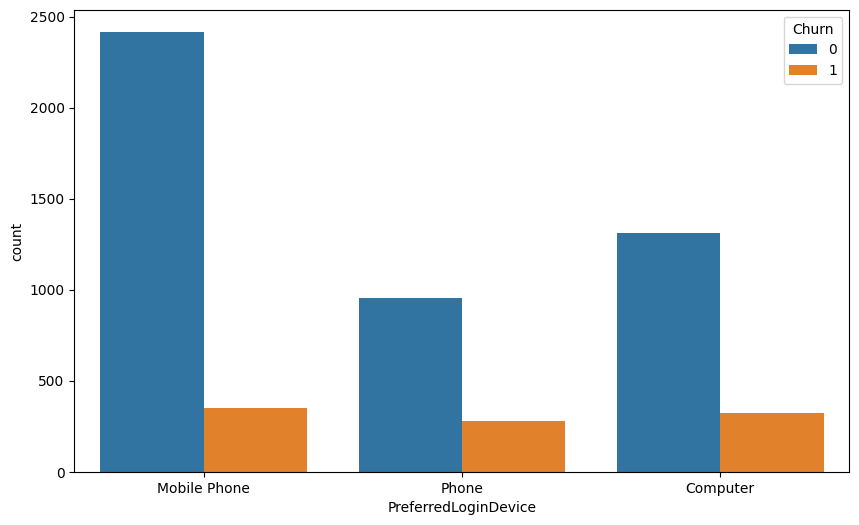

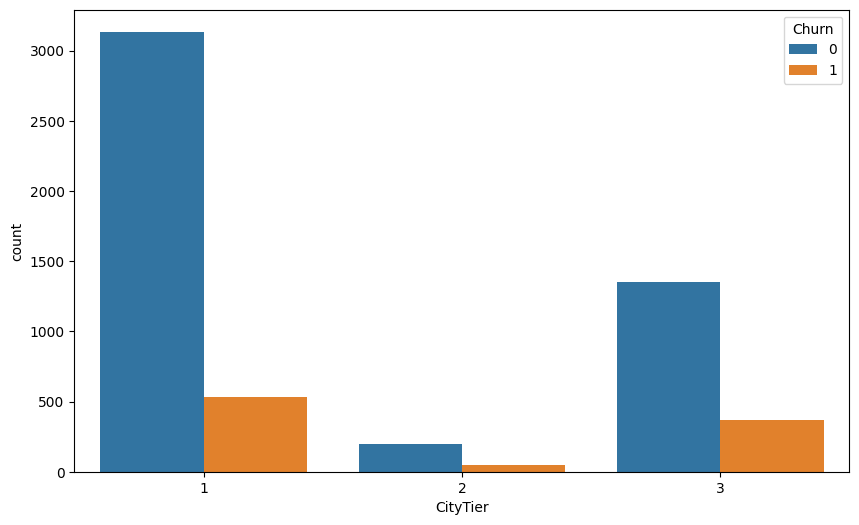

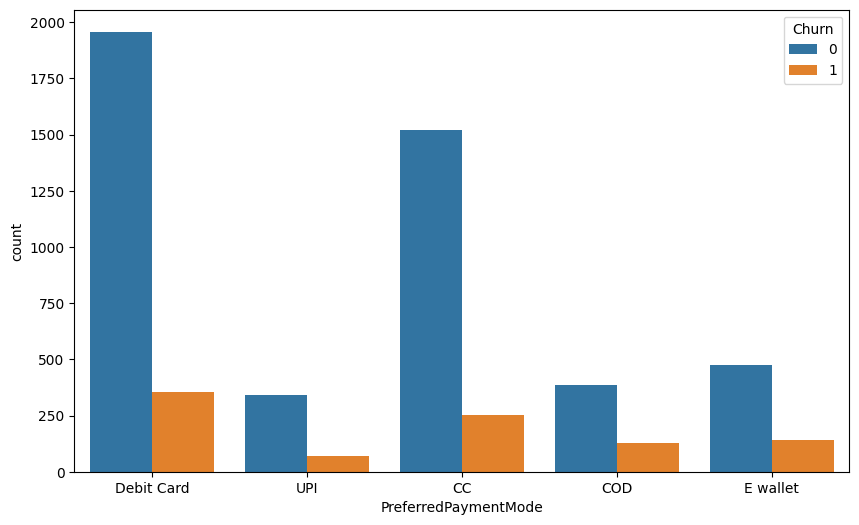

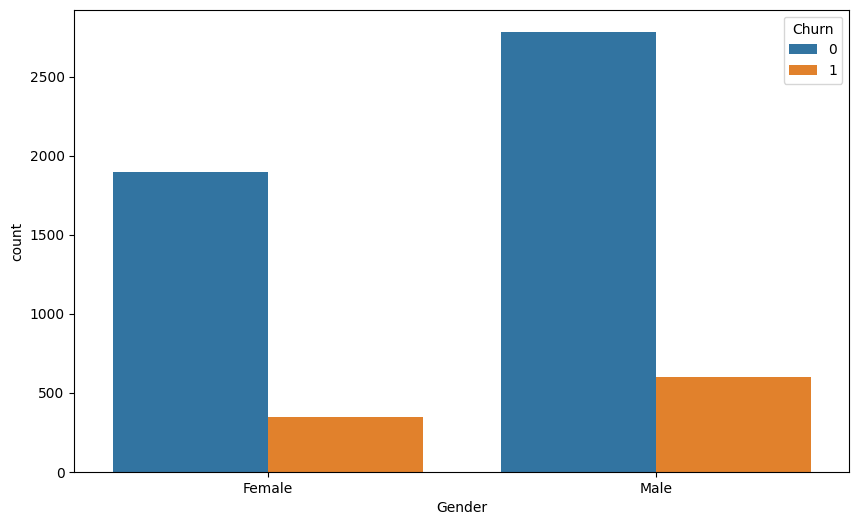

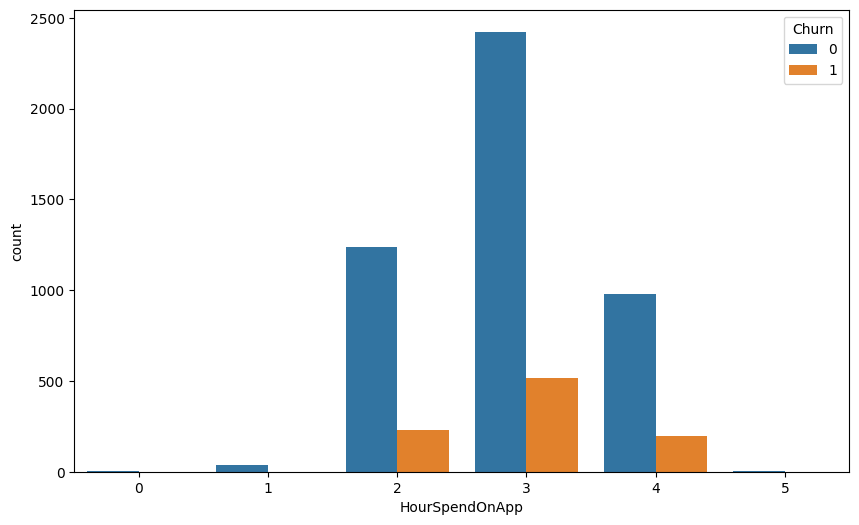

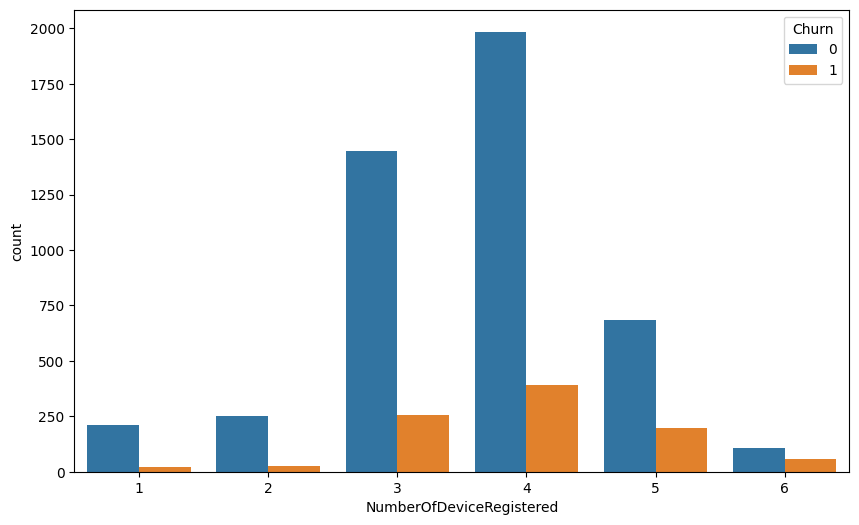

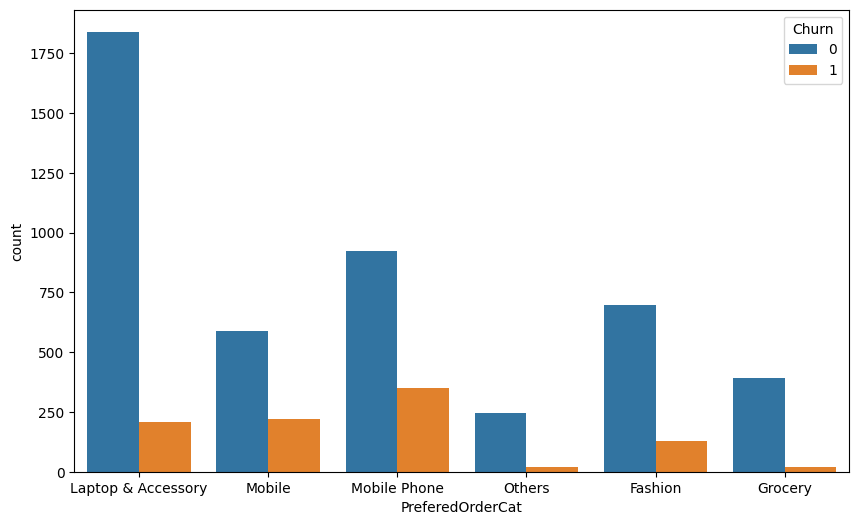

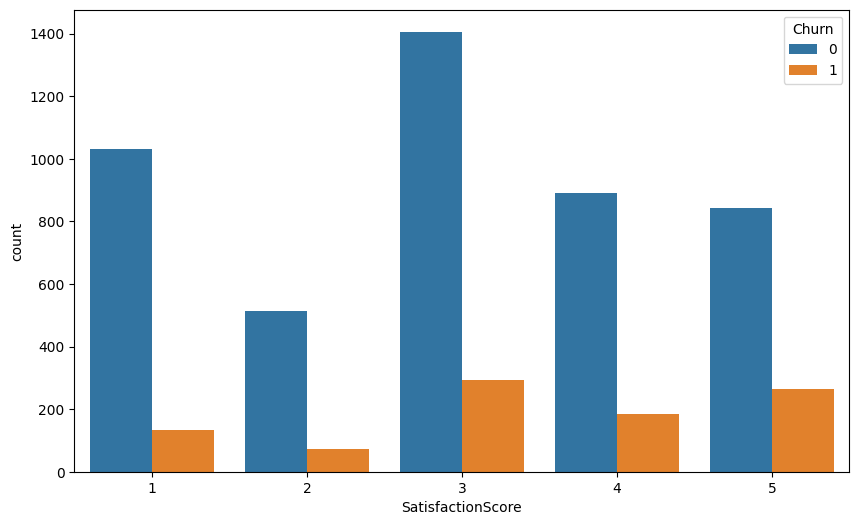

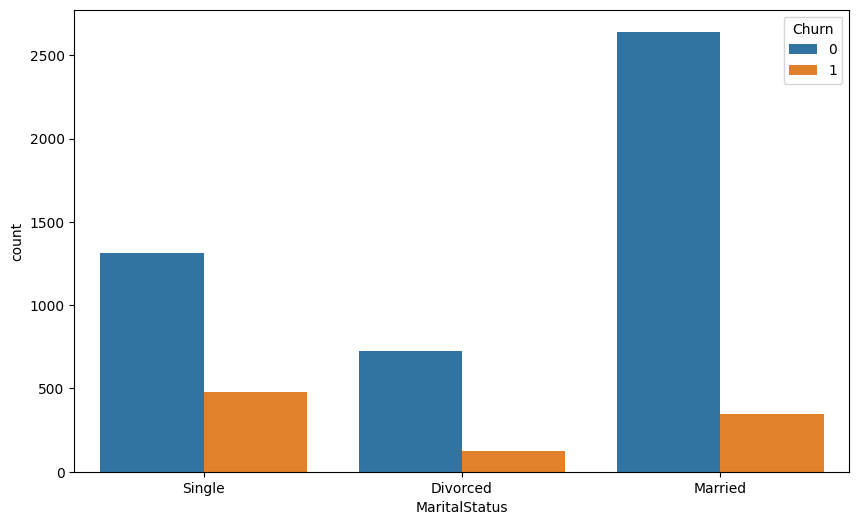

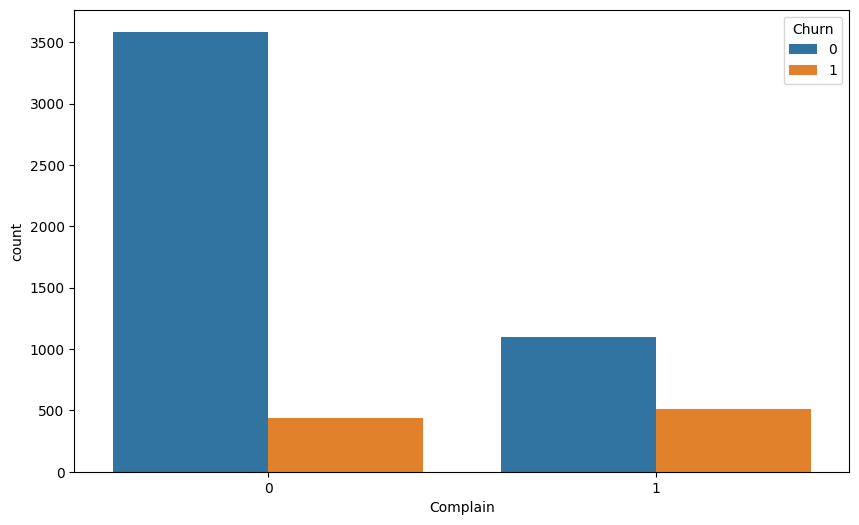

In [ ]:
#Bar chart
for i, predictor in enumerate(df_1.drop(columns=['Churn','Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount'])):
    plt.figure(i, figsize=(10, 6))
    sns.countplot(data=df_1, x=predictor, hue='Churn')

**Insight:**

*   Churn rates are higher when customers complain




**Heatmap**

In [ ]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_heat = df_1.copy()
for col in df_heat.columns:
  if df_heat[col].dtype == 'object':
    df_heat[col] = label_encoder.fit_transform(df_heat[col])

In [ ]:
df_heat

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,1,3,6,2,0,3,3,2,2,2,9,1,11,1,1,5,159.93
1,1,9,2,1,8,4,1,3,4,3,3,2,7,1,15,0,1,0,120.90
2,1,9,2,1,30,2,1,2,4,3,3,2,6,1,14,0,1,3,120.28
3,1,0,2,3,15,2,1,2,4,2,5,2,8,0,23,0,1,3,134.07
4,1,0,2,1,12,0,1,3,3,3,5,2,3,0,11,1,1,3,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10,0,1,30,0,1,3,2,2,1,1,6,0,18,1,2,4,150.71
5626,0,13,1,1,13,0,1,3,5,0,5,1,6,0,16,1,2,3,224.91
5627,0,1,1,1,11,2,1,3,2,2,4,1,3,1,21,1,2,4,186.42
5628,0,23,0,3,9,0,1,4,5,2,4,1,4,0,15,2,2,9,178.90


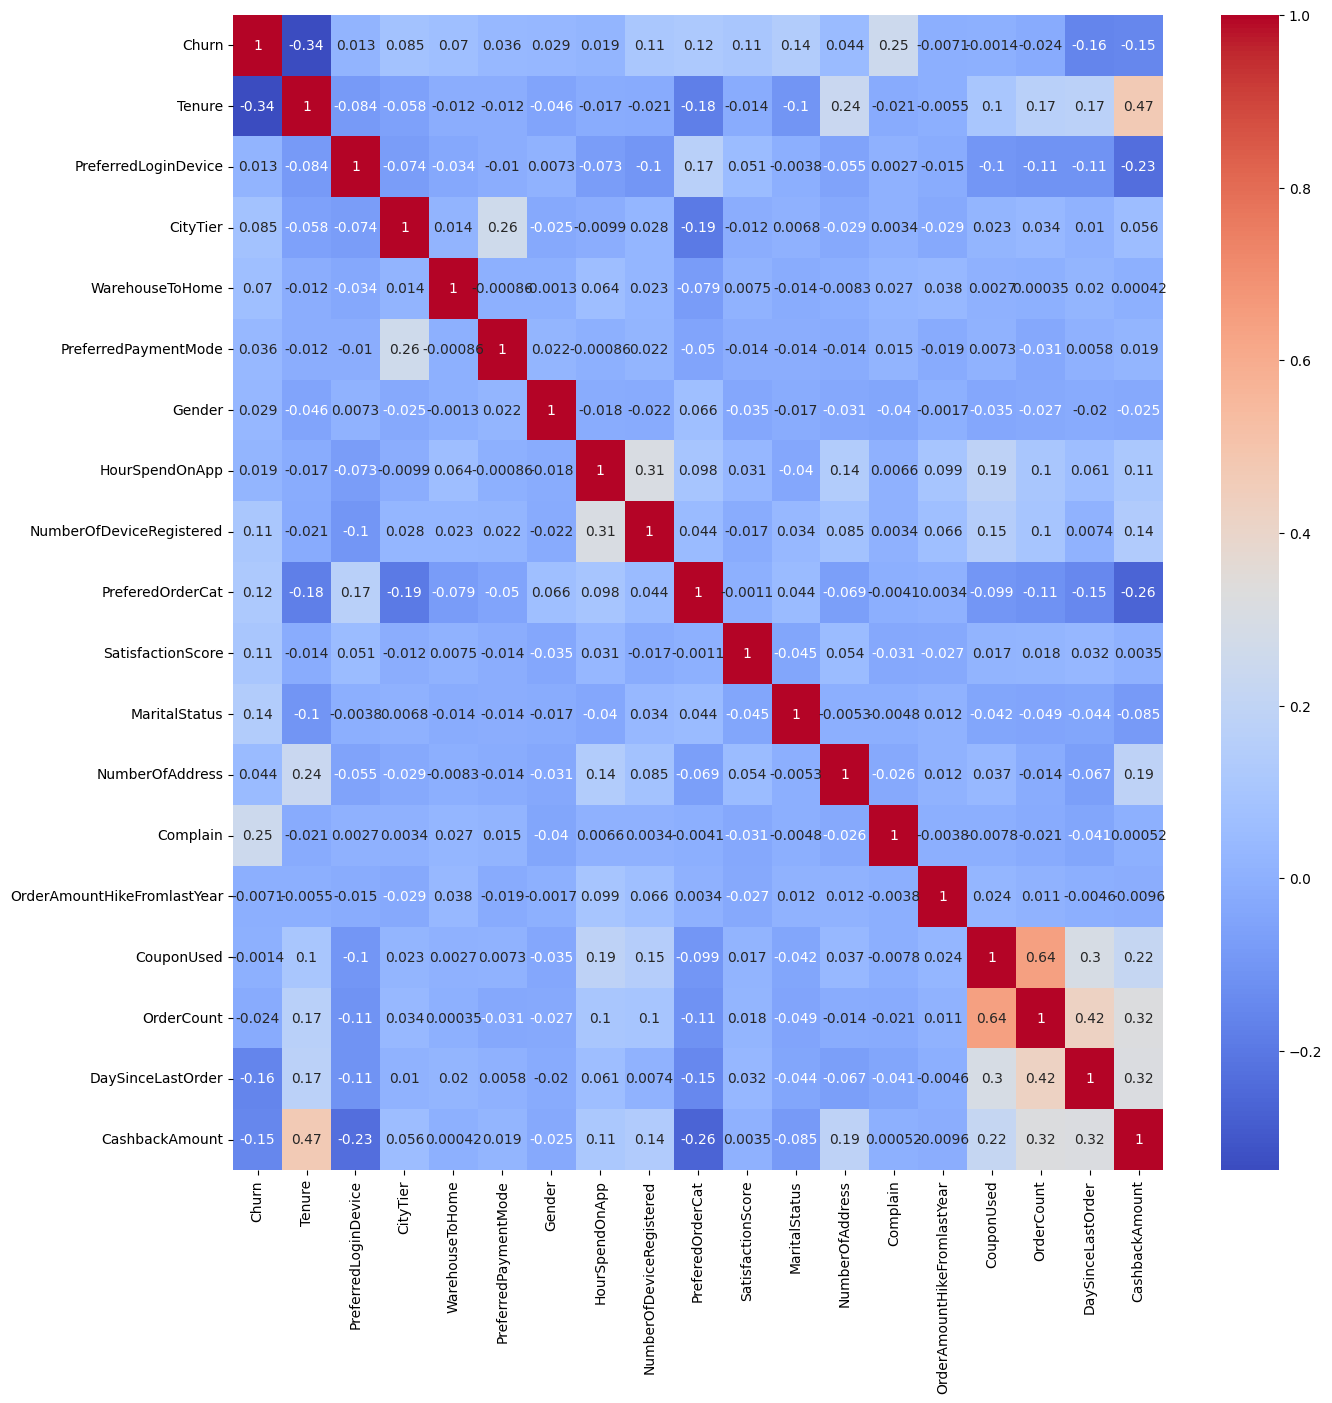

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df_heat.corr(), cmap = 'coolwarm', annot = True)
plt.show()

**Insight:**

*   **High churn rates** when customers have **low tenure** or **complain**
*   Factors like **OrderAmountHikeFromlastYear, CouponUsed, Gender, HourSpendOnApp** have almost **no** impact on Churn



# **Conclusion**

*   Customers who churn are mainly customers with short tenures (0 - 10 tenures)
*   Most customers churn after their 1st or 2nd order

*   Churn rates are higher when customers complain
